In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("/content/sample_data/Bengaluru_House_Data (1).csv")
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [ ]:
df.isnull().sum()

,0
area_type,0
availability,0
location,1
size,16
society,5502
total_sqft,0
bath,73
balcony,609
price,0


In [ ]:
df.drop("society",axis=1,inplace=True)

In [ ]:
df.dropna(subset=["size"],inplace=True)

In [ ]:
df.dropna(subset=["bath"],inplace=True)

In [ ]:
df.dropna(subset=["location"],inplace=True)

In [ ]:
df.isnull().sum()

,0
area_type,0
availability,0
location,0
size,0
total_sqft,0
bath,0
balcony,536
price,0


In [ ]:
df.drop("balcony",axis=1,inplace=True)

In [ ]:
df.isnull().sum()

,0
area_type,0
availability,0
location,0
size,0
total_sqft,0
bath,0
price,0


In [ ]:
df.duplicated().sum()

np.int64(668)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13246 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13246 non-null  object 
 1   availability  13246 non-null  object 
 2   location      13246 non-null  object 
 3   size          13246 non-null  object 
 4   total_sqft    13246 non-null  object 
 5   bath          13246 non-null  float64
 6   price         13246 non-null  float64
dtypes: float64(2), object(5)
memory usage: 827.9+ KB


In [ ]:
df["area_type"].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [ ]:
df["area_type"].replace(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'],[1,2,3,4],inplace=True)

/tmp/ipython-input-3492715878.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["area_type"].replace(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
/tmp/ipython-input-3492715878.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["area_type"].replace(['Super built-up  Area', 'Plot 

In [ ]:
df["availability"].unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '18-Apr',
       '20-Aug', '19-Mar', '17-Sep', '18-Dec', '17-Aug', '19-Apr',
       '18-Jun', '22-Dec', '22-Jan', '18-Aug', '19-Jan', '17-Jul',
       '18-Jul', '21-Jun', '20-May', '19-Aug', '18-Sep', '17-May',
       '17-Jun', '18-Oct', '21-May', '18-Jan', '20-Mar', '17-Dec',
       '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb', '19-May',
       '17-Nov', '20-Oct', '20-Jun', '19-Feb', '21-Oct', '21-Jan',
       '17-Mar', '17-Apr', '22-May', '19-Oct', '21-Jul', '21-Nov',
       '21-Mar', '16-Dec', '22-Mar', '20-Jan', '21-Sep', '21-Aug',
       '14-Nov', '19-Nov', '15-Nov', '16-Jul', '15-Jun', '17-Feb',
       '20-Nov', '20-Jul', '16-Sep', '15-Oct', '20-Feb', '15-Dec',
       '16-Oct', '22-Nov', '15-Aug', '17-Jan', '16-Nov', '20-Apr',
       '16-Jan', '14-Jul'], dtype=object)

In [ ]:
df['availability'] = pd.to_datetime(df['availability'], format='%d-%b', errors='coerce')

In [ ]:
median_date = df['availability'].median()

In [ ]:
# Replace NaT with this middle date
df['availability'] = df['availability'].fillna(median_date)


In [ ]:
df

,area_type,availability,location,size,total_sqft,bath,price
0,1,1900-12-19,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,2,1900-07-18,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,3,1900-07-18,Uttarahalli,3 BHK,1440,2.0,62.00
3,1,1900-07-18,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,1,1900-07-18,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...,...,...
13315,3,1900-07-18,Whitefield,5 Bedroom,3453,4.0,231.00
13316,1,1900-07-18,Richards Town,4 BHK,3600,5.0,400.00
13317,3,1900-07-18,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,1,1900-06-18,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13246 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   area_type     13246 non-null  int64         
 1   availability  13246 non-null  datetime64[ns]
 2   location      13246 non-null  object        
 3   size          13246 non-null  object        
 4   total_sqft    13246 non-null  object        
 5   bath          13246 non-null  float64       
 6   price         13246 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 827.9+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['location'] = le.fit_transform(df['location'])


In [ ]:
df

,area_type,availability,location,size,total_sqft,bath,price
0,1,1900-12-19,419,2 BHK,1056,2.0,39.07
1,2,1900-07-18,317,4 Bedroom,2600,5.0,120.00
2,3,1900-07-18,1178,3 BHK,1440,2.0,62.00
3,1,1900-07-18,756,3 BHK,1521,3.0,95.00
4,1,1900-07-18,715,2 BHK,1200,2.0,51.00
...,...,...,...,...,...,...,...
13315,3,1900-07-18,1251,5 Bedroom,3453,4.0,231.00
13316,1,1900-07-18,1003,4 BHK,3600,5.0,400.00
13317,3,1900-07-18,971,2 BHK,1141,2.0,60.00
13318,1,1900-06-18,906,4 BHK,4689,4.0,488.00


In [ ]:
df["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [ ]:
df["month"]=df["availability"].dt.month

In [ ]:
df["Day"]=df["availability"].dt.day
df["year"]=df["availability"].dt.year

In [ ]:
df.drop("availability",axis=1,inplace=True)

In [ ]:
df.drop("year",axis=1,inplace=True)

In [ ]:
df

,area_type,location,size,total_sqft,bath,price,month,Day
0,1,419,2 BHK,1056,2.0,39.07,12,19
1,2,317,4 Bedroom,2600,5.0,120.00,7,18
2,3,1178,3 BHK,1440,2.0,62.00,7,18
3,1,756,3 BHK,1521,3.0,95.00,7,18
4,1,715,2 BHK,1200,2.0,51.00,7,18
...,...,...,...,...,...,...,...,...
13315,3,1251,5 Bedroom,3453,4.0,231.00,7,18
13316,1,1003,4 BHK,3600,5.0,400.00,7,18
13317,3,971,2 BHK,1141,2.0,60.00,7,18
13318,1,906,4 BHK,4689,4.0,488.00,6,18


In [ ]:
df["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [ ]:
a="2 BHK"
print(a.split())

['2', 'BHK']


In [ ]:
import pandas as pd


def split_features(value):
    if 'BHK' in value:

        bedroom = int(value.split()[0])
        hall = 1
        kitchen = 1
    elif 'Bedroom' in value:

        bedroom = int(value.split()[0])
        hall = 0
        kitchen = 0
    elif value == '1 RK':
        bedroom = 1
        hall = 0
        kitchen = 1
    else:
        bedroom = None
        hall = None
        kitchen = None
    return bedroom, hall, kitchen


df[['Bedroom', 'Hall', 'Kitchen']] = df['size'].apply(lambda x: pd.Series(split_features(x)))


df


,area_type,location,size,total_sqft,bath,price,month,Day,Bedroom,Hall,Kitchen
0,1,419,2 BHK,1056,2.0,39.07,12,19,2,1,1
1,2,317,4 Bedroom,2600,5.0,120.00,7,18,4,0,0
2,3,1178,3 BHK,1440,2.0,62.00,7,18,3,1,1
3,1,756,3 BHK,1521,3.0,95.00,7,18,3,1,1
4,1,715,2 BHK,1200,2.0,51.00,7,18,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...
13315,3,1251,5 Bedroom,3453,4.0,231.00,7,18,5,0,0
13316,1,1003,4 BHK,3600,5.0,400.00,7,18,4,1,1
13317,3,971,2 BHK,1141,2.0,60.00,7,18,2,1,1
13318,1,906,4 BHK,4689,4.0,488.00,6,18,4,1,1


In [ ]:
df.drop("size",axis=1,inplace=True)

In [ ]:
df

,area_type,location,total_sqft,bath,price,month,Day,Bedroom,Hall,Kitchen
0,1,419,1056,2.0,39.07,12,19,2,1,1
1,2,317,2600,5.0,120.00,7,18,4,0,0
2,3,1178,1440,2.0,62.00,7,18,3,1,1
3,1,756,1521,3.0,95.00,7,18,3,1,1
4,1,715,1200,2.0,51.00,7,18,2,1,1
...,...,...,...,...,...,...,...,...,...,...
13315,3,1251,3453,4.0,231.00,7,18,5,0,0
13316,1,1003,3600,5.0,400.00,7,18,4,1,1
13317,3,971,1141,2.0,60.00,7,18,2,1,1
13318,1,906,4689,4.0,488.00,6,18,4,1,1


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['price']=le.fit_transform(df['price'])


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['bath']=le.fit_transform(df['bath'])
df['total_sqft']=le.fit_transform(df['total_sqft'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13246 entries, 0 to 13319
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   area_type   13246 non-null  int64
 1   location    13246 non-null  int64
 2   total_sqft  13246 non-null  int64
 3   bath        13246 non-null  int64
 4   price       13246 non-null  int64
 5   month       13246 non-null  int32
 6   Day         13246 non-null  int32
 7   Bedroom     13246 non-null  int64
 8   Hall        13246 non-null  int64
 9   Kitchen     13246 non-null  int64
dtypes: int32(2), int64(8)
memory usage: 1.0 MB


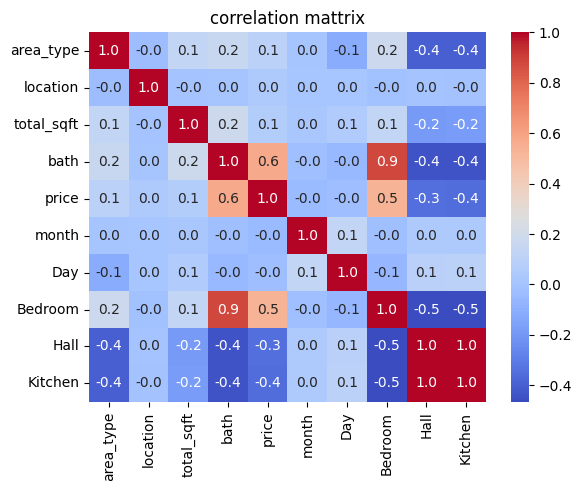

In [ ]:
cm=df.corr()
sns.heatmap(cm,annot=True,fmt="0.1f",cmap="coolwarm")
plt.title("correlation mattrix")
plt.show()

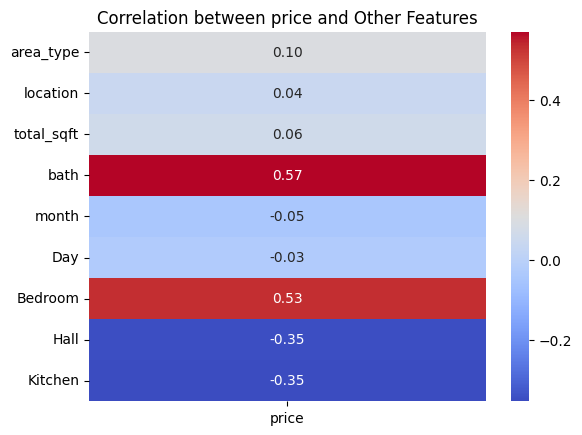

In [ ]:
survived_corr = df.corr()["price"]
survived_corr = survived_corr.drop('price')
sns.heatmap(survived_corr.to_frame(), annot=True, fmt='.2f', cmap='coolwarm',
            cbar=True, annot_kws={'size': 10})
plt.title('Correlation between price and Other Features')
plt.show()

In [ ]:
df.drop(["Bedroom"],axis=1,inplace=True)

<Axes: >

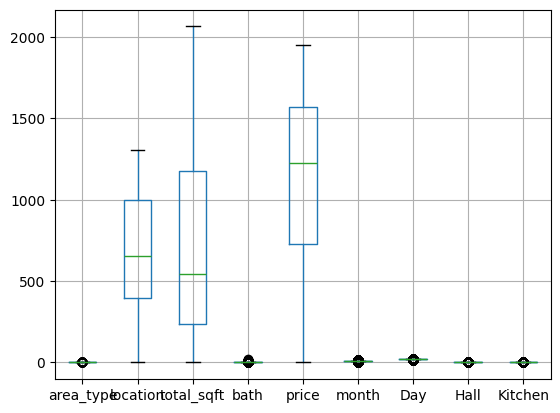

In [ ]:
df.boxplot()

In [ ]:
def remove_outliers_iqr(df, exclude_column):
    for col in df.columns:
        if col == exclude_column:
            continue
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df


df_cleaned = remove_outliers_iqr(df, exclude_column='price')
df=df_cleaned

In [ ]:
df

,area_type,location,total_sqft,bath,price,month,Day,Hall,Kitchen
2,3,1178,505,1,1031,7,18,1,1
3,1,756,586,2,1495,7,18,1,1
4,1,715,237,1,754,7,18,1,1
5,1,1251,203,1,343,7,18,1,1
7,1,975,1429,3,1872,7,18,1,1
...,...,...,...,...,...,...,...,...,...
13312,1,236,315,1,643,7,18,1,1
13313,1,1178,404,1,926,7,18,1,1
13314,1,474,783,2,1560,7,18,1,1
13317,3,971,170,1,988,7,18,1,1


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
features = ["area_type","location","total_sqft","bath","month","Day","Hall","Kitchen"]
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[features])
scaled_df = pd.DataFrame(scaled_data, columns=features)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
import pandas as pd
x=df[["area_type","location","total_sqft","bath","month","Day","Hall","Kitchen"]]
y=df[["price"]]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25, random_state=42)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
score = model.score(x_test, y_test)
print(f'Baseline model R^2 score: {score:.2f}')


Baseline model R^2 score: 0.43


In [ ]:
from sklearn.svm import SVR
model=SVR(kernel="linear")
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
score = model.score(x_test, y_test)
print(f'Baseline model R^2 score: {score:.2f}')

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Baseline model R^2 score: 0.42


In [ ]:
from sklearn.svm import SVR
model=SVR(kernel="poly",degree=8)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
score = model.score(x_test, y_test)
print(f'Baseline model R^2 score: {score:.2f}')

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Baseline model R^2 score: 0.19


In [ ]:
from sklearn.svm import SVR
model=SVR(kernel="rbf")
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
score = model.score(x_test, y_test)
print(f'Baseline model R^2 score: {score:.2f}')

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Baseline model R^2 score: 0.36
